In [55]:
using LinearAlgebra
using Plots
using IterTools

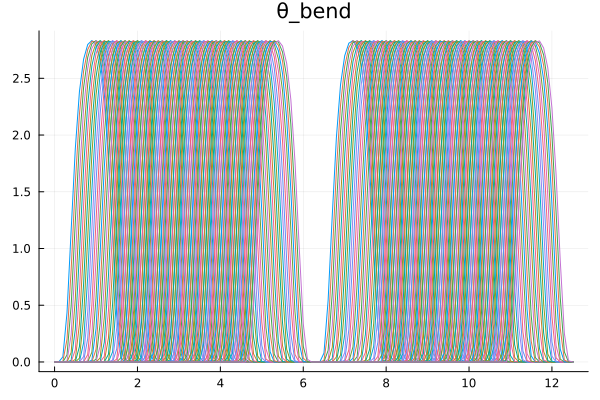

In [56]:
include("TangentAngleOscillator.jl")

In [57]:
s = collect(0.0:L/20:L)
# ψ_array = collect(π:(3.839026222686727 - π)/50:3.839026222686727)
ψ_array = collect(0.0:8*π/100:8*π)

100-element Vector{Float64}:
  0.0
  0.25132741228718347
  0.5026548245743669
  0.7539822368615504
  1.0053096491487339
  1.2566370614359172
  1.5079644737231008
  1.7592918860102844
  2.0106192982974678
  2.261946710584651
  ⋮
 22.870794518133696
 23.122121930420878
 23.373449342708064
 23.624776754995246
 23.87610416728243
 24.127431579569613
 24.378758991856795
 24.63008640414398
 24.881413816431163

┌ Info: Saved animation to C:\Users\pablo\AppData\Local\Temp\jl_FI3WPWtSZC.gif
└ @ Plots C:\Users\pablo\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\pablo\\AppData\\Local\\Temp\\jl_FI3WPWtSZC.gif")
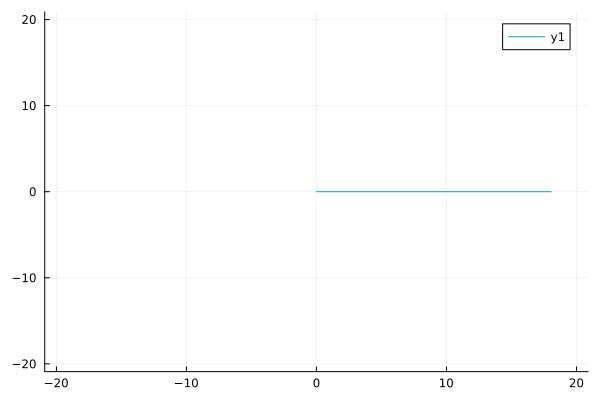

In [53]:
p = plot(xlim=(-L*1.1, L*1.1), ylim=(-L*1.1, L*1.1))
@gif for ψ in ψ_array
    positions = zeros(20, 3)
    for i=1:20
        positions[i, :] += ξ(s[i], ψ)
    end
    plot(p, positions[:, 1], positions[:, 3])
end

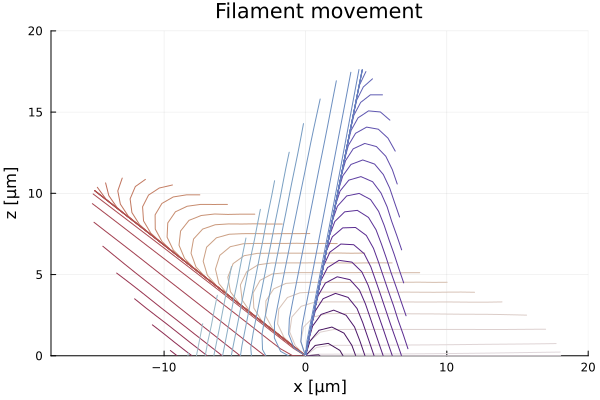

In [54]:
p = plot(
    xlim=(-L+1.0, L+1.0), ylim=(0.0, L+1.0), title="Filament movement",
    xaxis="x [μm]", yaxis="z [μm]", legend=false
)
color_scheme = palette(:twilight, length(ψ_array), rev=true)
for (i, ψ) in enumerate(ψ_array)
    positions = zeros(20, 3)
    for i=1:20
        positions[i, :] .= ξ(s[i], ψ)
    end
    plot!(positions[:, 1], positions[:, 3], color=color_scheme[i])
end
display(p)

In [62]:
function R(t)
    return [cos(t) 0 -sin(t); 0 1 0; sin(t) 0 cos(t)]
end

R (generic function with 1 method)

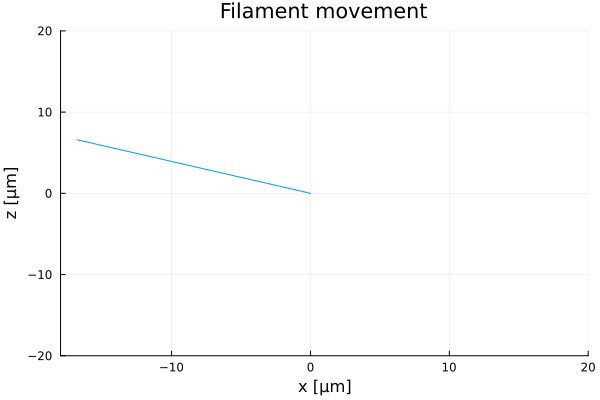

In [63]:
ψ = 6.28497151155673
positions = zeros(20, 3)
for i=1:20
    positions[i, :] .= R(0.22458193450871614)*ξ(s[i], ψ)
end
plot(positions[:, 1], positions[:, 3], xlim=(-L+1.0, L+1.0), ylim=(-L-1.0, L+1.0), title="Filament movement", xaxis="x [μm]", yaxis="z [μm]", legend=false)